# Linear Regression

## The Problem statement:

This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper. The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale?

In [1]:
# necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
data = pd.read_csv('Advertising.csv') # Reading the data file

In [3]:
data.head() # checking the first five rows from the dataset

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: Advertising dollars spent on Radio
- Newspaper: Advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [4]:
data.shape

(200, 5)

In [5]:
data.info() # printing the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.isna().sum() # finding the count of missing values from different columns

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

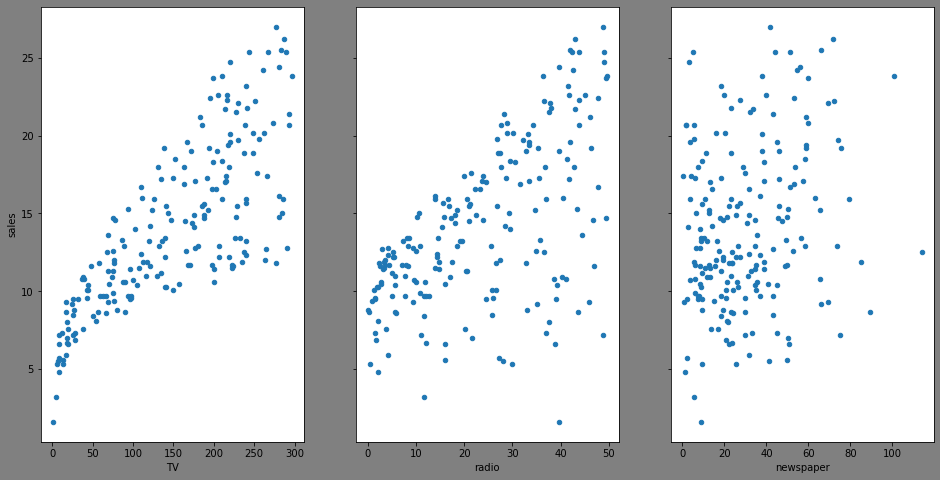

In [7]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey = True, facecolor = 'grey')
data.plot(kind = 'scatter', x = 'TV', y = 'sales', ax = axs[0], figsize = (16, 8))
data.plot(kind = 'scatter', x = 'radio', y = 'sales', ax = axs[1])
data.plot(kind = 'scatter', x = 'newspaper', y = 'sales', ax = axs[2])

### Questions about the data

A generic question shall be: How the company should optimise the spends on advertising to maximise the sales?

These general questions might lead you to more specific questions:
1. What’s the relationship between ads and sales?
2. How prominent is that relationship?
3. Which ad types contribute to sales?
4. How each ad contributes to sales?
5. Can sales be predicted based on the expense of the advertisement?

We will explore these questions below!

## Simple Linear Regression

Simple Linear regression is a method for predicting a **quantitative response** using a **single feature** ("input variable"). The mathematical equation is:

$y = \beta_0 + \beta_1x$

What do terms represent?
- $y$ is the response or the target variable
- $x$ is the feature
- $\beta_1$ is the coefficient of x
- $\beta_0$ is the intercept

$\beta_0$ and $\beta_1$ are the **model coefficients**. To create a model, we must "learn" the values of these coefficients. And once we have the value of these coefficients, we can use the model to predict the Sales!


In [8]:
# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.sales

In [9]:
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [10]:
# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


### Interpreting the model

How do we interpret the coefficient for spends on TV ad ($\beta_1$)?
- A "unit" increase in spends on a TV ad is **associated with** a 0.047537 "unit" increase in Sales.
- Or, an additional $1,000  on TV ads is **translated to** an increase in sales by 47.53 Dollars.

As an increase in TV ad expenditure is associated with a **decrease** in sales, $\beta_1$ would be **negative**.

### Prediction  using the model

If the expense on TV ad is $50000, what will be the sales prediction for that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [11]:
#calculate the prediction
y_pred = 7.032594 + (0.047537 * 50)
y_pred

9.409444

In [12]:
#  Let's create a DataFrame since the model expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [13]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([9.40942557])

### Plotting the Least Squares Line

In [14]:
# create a DataFrame with the minimum and maximum values
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [15]:
# make predictions
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

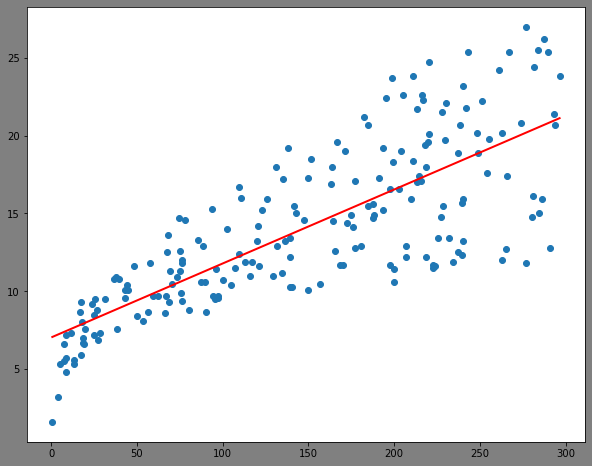

In [16]:
plt.figure(figsize = (10, 8), facecolor = 'grey')
# first plot the observed data
#data.plot(kind = 'scatter', x = 'TV', y = 'sales')
plt.scatter(x = 'TV', y = 'sales', data = data)
# then, plot the least square line
plt.plot(X_new, preds, c = 'r', linewidth = 2)

### Model Confidence

In [17]:
lm.score(X, y)

0.611875050850071

Model will be able to give 61% accurate result.

### Statistical Model
- Statistical modeling is performed for evaluating different-different variants which we have inside the dataset.
- It will also tell what is effect of the features on the target variable or the result.
- It is not used for prediction but it is used for find effectiveness of the features on the final target.
- We use statsmodels module for performing statistical modeling.
- OLS - Ordinary Least Square method

In [19]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'sales ~ TV', data = data).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


#### Hypothesis Testing and p-values

**Hypothesis testing** is Closely related to confidence intervals. We start with a **null hypothesis** and an **alternate hypothesis** (that is opposite to the null). Then, we check whether the data **rejects the null hypothesis** or **fails to reject the null hypothesis**.

("Failing to reject" the null hypothesis does not mean "accepting" the null hypothesis. The alternative hypothesis might indeed be true, but that we just don't have enough data to prove that.)

The conventional hypothesis test is as follows:
- **Null hypothesis:** No relationship exists between TV advertisements and Sales (and hence $\beta_1$ equals zero).
- **Alternative hypothesis:** There exists a relationship between TV advertisements and Sales (and hence, $\beta_1$ is not equal to zero).

How do we test this? We reject the null hypothesis (and thus believe the alternative hypothesis) if the 95% confidence interval **does not include zero**. The **p-value** represents the probability of the coefficient actually being zero.


In [20]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. 

Thus, a p-value of less than 0.05 is a way to decide whether there is any relationship between the feature in consideration and the response or not. Using 0.05 as the cutoff is just a convention.

In this case, the p-value for TV ads is way less than 0.05, and so we **believe** that there is a relationship between TV advertisements and Sales.

Note that we generally ignore the p-value for the intercept.


#### How Well Does the Model Fit the data?

One of the most generic way to evaluate the fit of a linear model is by computing the **R-squared** value. R-squared explains the**proportion of variance**, i.e., the proportion of variance in the observed data which the model explains, or the reduction in error over the **null model**. (A null model only predicts the mean of all the observed responses, and thus it only has an intercept and no slope.)

The value of R-squared lies between 0 and 1. A value closer to 1 is better as it means that more variance is explained by the model. 

In [21]:
# print the R-squared value for the model
lm.rsquared

0.611875050850071

## Multiple Linear Regression
Till now, we have created the model based on only one feature. Now, we’ll include multiple features and create a model to see the relationship between those features and the label column.
This is called **Multiple Linear Regression**.

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients


In [22]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [23]:
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data = data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           1.58e-96
Time:                        11:55:29   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are the things to be learnt from this summary?

- TV and Radio have positive **p-values**, whereas Newspaper has a negative one. Hence, we can reject the null hypothesis for TV and Radio that there is no relation between those features and Sales, but we fail to reject the null hypothesis for Newspaper that there is no relationship between newspaper spends and sales.
- The expenses on bot TV and Radio ads are**positively associated** with Sales, whereas the expense on newspaper ad is **slightly negatively associated** with the Sales.
- This model has a higher value of **R-squared** (0.897) than the previous model, which means that this model explains more variance and provides a better fit to the data than a model that only includes the TV.


### Feature Selection

How do I decide **which features have to be included** in a linear model? Here's one idea:
- Try different models, and only keep predictors in the model if they have small p-values.
- Check if the R-squared value goes up when you add new predictors to the model.

What are the **drawbacks** in this approach?
-If the underlying assumptions for creating a Linear model(the features being independent) are violated(which usually is the case),p-values and R-squared values are less reliable.
- Using a p-value cutoff of 0.05 means that adding 100 predictors to a model that are **pure noise**, still 5 of them (on average) will be counted as significant.
- R-squared is susceptible to **model overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalise. Following is an example:


In [24]:
# only include TV and Radio in the model
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm.rsquared

0.8971942610828956

In [25]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.rsquared

0.8972106381789522